In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.cm import ScalarMappable

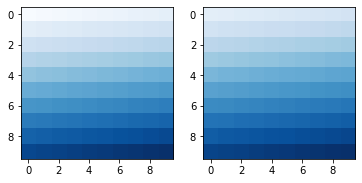

In [2]:
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('Blues')
new_cmap = truncate_colormap(cmap, 0.1, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

In [3]:
plt.rcParams.update({'font.size': 18})

In [4]:
from dask.distributed import Client

In [5]:
import numpy as np

In [6]:
client = Client(n_workers=3, threads_per_worker=4, memory_limit=8e9, ip="0.0.0.0")
client

/opt/conda/lib/python3.10/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41325 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://134.245.3.15:41325/status,
Dashboard: http://134.245.3.15:41325/status,Workers: 3
Total threads: 12,Total memory: 22.35 GiB
Status: running,Using processes: True
Comm: tcp://134.245.3.15:42859,Workers: 3
Dashboard: http://134.245.3.15:41325/status,Total threads: 12
Started: Just now,Total memory: 22.35 GiB
Comm: tcp://134.245.3.15:38299,Total threads: 4
Dashboard: http://134.245.3.15:34171/status,Memory: 7.45 GiB
Nanny: tcp://134.245.3.15:41351,


In [7]:
ROMS = xr.open_mfdataset('/gxfs_work1/geomar/smomw523/master-thesis/data/config/ROMS/roms_avg0*_2009_datetime.nc')

lat_top = -21.5
lat_bottom = -25
lon_left = 6.5
lon_right = 9.5


mask_path = Path("/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/")
mesh_mask_filename = '1_INALT20.L46-KFS119_mesh_mask_iMirabilis.nc'
mesh_mask = mask_path / mesh_mask_filename

In [8]:
ROMS

<xarray.Dataset>
Dimensions:     (time: 365, xi_rho: 238, xi_u: 237, eta_rho: 258, eta_v: 257,
                 s_rho: 32, s_w: 33, auxil: 4)
Coordinates: (12/13)
  * xi_rho      (xi_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 235.0 236.0 237.0 238.0
  * xi_u        (xi_u) float32 1.5 2.5 3.5 4.5 5.5 ... 234.5 235.5 236.5 237.5
  * eta_rho     (eta_rho) float32 1.0 2.0 3.0 4.0 ... 255.0 256.0 257.0 258.0
  * eta_v       (eta_v) float32 1.5 2.5 3.5 4.5 5.5 ... 254.5 255.5 256.5 257.5
  * s_rho       (s_rho) float32 -0.9844 -0.9531 -0.9219 ... -0.04688 -0.01562
  * s_w         (s_w) float32 -1.0 -0.9688 -0.9375 ... -0.0625 -0.03125 0.0
    ...          ...
    lat_rho     (eta_rho, xi_rho) float32 dask.array<chunksize=(258, 238), meta=np.ndarray>
    lon_u       (eta_rho, xi_u) float32 dask.array<chunksize=(258, 237), meta=np.ndarray>
    lat_u       (eta_rho, xi_u) float32 dask.array<chunksize=(258, 237), meta=np.ndarray>
    lon_v       (eta_v, xi_rho) float32 dask.array<chunksize=(257, 238), meta=np.ndarray>
    lat_v       (eta_v, xi_rho) float32 dask.array<chunksize=(257, 238), meta=np.ndarray>
  * time        (time) datetime64[ns] 2009-01-01 2009-01-02 ... 2009-12-31
Dimensions without coordinates: auxil
Data variables: (12/24)
    spherical   (time) |S1 b'T' b'T' b'T' b'T' b'T' ... b'T' b'T' b'T' b'T' b'T'
    xl          (time) float32 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    el          (time) float32 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    Vtransform  (time) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    sc_r        (time, s_rho) float32 dask.array<chunksize=(60, 32), meta=np.ndarray>
    sc_w        (time, s_w) float32 dask.array<chunksize=(60, 33), meta=np.ndarray>
    ...          ...
    u           (time, s_rho, eta_rho, xi_u) float32 dask.array<chunksize=(60, 32, 258, 237), meta=np.ndarray>
    v           (time, s_rho, eta_v, xi_rho) float32 dask.array<chunksize=(60, 32, 257, 238), meta=np.ndarray>
    temp        (time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(60, 32, 258, 238), meta=np.ndarray>
    salt        (time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(60, 32, 258, 238), meta=np.ndarray>
    w           (time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(60, 32, 258, 238), meta=np.ndarray>
    diff3d      (time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(60, 32, 258, 238), meta=np.ndarray>
Attributes: (12/53)
    type:          ROMS averages file
    title:         BENGUELA TEST MODEL
    date:          
    rst_file:      ROMS_FILES/roms_rst01_2009.nc
    his_file:      ROMS_FILES/roms_his01_2009.nc
    avg_file:      ROMS_FILES/roms_avg01_2009.nc
    ...            ...
    gamma2_expl:   Slipperiness parameter
    x_sponge:      0.0
    v_sponge:      0.0
    sponge_expl:   Sponge parameters : extent (m) & viscosity (m2.s-1)
    SRCS:          main.F step.F read_inp.F timers_roms.F init_scalars.F init...
    CPP-options:   REGIONAL OPENMP AGRIF TIDES OBC_EAST OBC_WEST OBC_NORTH OB...

In [9]:
u = ROMS["u"]#.sel(time=slice('2009-03-01T00:00:00','2009-04-13T00:00:00'))#.where(
     #(ROMS.lat_u >= lat_bottom-1) & (ROMS.lat_u <= lat_top+1) \
     #& (ROMS.lon_u >= lon_left-1.05) & (ROMS.lon_u <= lon_right+1), drop=True)
u = u.isel(eta_rho=slice(0,len(u.eta_rho)-1))

In [10]:
v = ROMS["v"]#.sel(time=slice('2009-03-01T00:00:00','2009-04-13T00:00:00'))#.where(
     #(ROMS.lat_v >= lat_bottom-1) & (ROMS.lat_v <= lat_top+1) \
     #& (ROMS.lon_v >= lon_left-1) & (ROMS.lon_v <= lon_right+1), drop=True)
v = v.isel(xi_rho=slice(0,len(v.xi_rho)-1))

In [11]:
w = ROMS["w"]#.sel(time=slice('2009-03-01T00:00:00','2009-04-13T00:00:00'))#.where(
     #(ROMS.lat_rho >= lat_bottom-1) & (ROMS.lat_rho <= lat_top+1) \
     #& (ROMS.lon_rho >= lon_left-1.05) & (ROMS.lon_rho <= lon_right+1), drop=True)
w = w.isel(eta_rho=slice(0,len(w.eta_rho)-1), xi_rho=slice(0,len(w.xi_rho)-1))

In [12]:
u = u.rename("u").rename({"xi_u": "xi_rho"})
v = v.rename("v").rename({"eta_v": "eta_rho"});

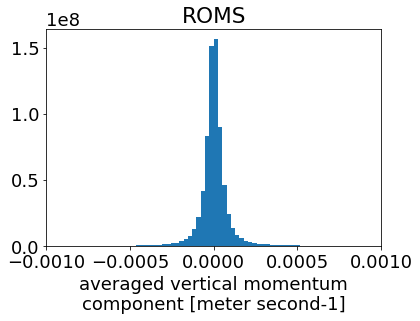

In [13]:
w.plot.hist(bins=1500)
plt.xlim([-0.001,0.001])
plt.title('ROMS');

In [14]:
u['xi_rho']=w['xi_rho']
v['eta_rho']=w['eta_rho']

In [15]:
vel = xr.combine_by_coords([u, v], compat='override', combine_attrs='drop_conflicts')

In [16]:
vel["vel"] = np.sqrt(vel.u**2 + vel.v**2)

In [17]:
vel = vel.compute()

In [18]:
vel

<xarray.Dataset>
Dimensions:  (xi_rho: 237, eta_rho: 257, s_rho: 32, time: 365)
Coordinates:
  * xi_rho   (xi_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 234.0 235.0 236.0 237.0
  * eta_rho  (eta_rho) float32 1.0 2.0 3.0 4.0 5.0 ... 254.0 255.0 256.0 257.0
  * s_rho    (s_rho) float32 -0.9844 -0.9531 -0.9219 ... -0.04688 -0.01562
    lon_u    (eta_rho, xi_rho) float32 6.517 6.532 6.547 ... 9.959 9.973 9.988
    lat_u    (eta_rho, xi_rho) float32 -24.96 -24.96 -24.96 ... -21.5 -21.5
  * time     (time) datetime64[ns] 2009-01-01 2009-01-02 ... 2009-12-31
    lon_v    (eta_rho, xi_rho) float32 6.51 6.525 6.539 ... 9.951 9.966 9.981
    lat_v    (eta_rho, xi_rho) float32 -24.95 -24.95 -24.95 ... -21.49 -21.49
Data variables:
    u        (time, s_rho, eta_rho, xi_rho) float32 -0.01288 ... -0.1476
    v        (time, s_rho, eta_rho, xi_rho) float32 -0.01263 ... 0.04575
    vel      (time, s_rho, eta_rho, xi_rho) float32 0.01804 0.009064 ... 0.1546

## With vertical

In [19]:
vel_w = xr.combine_by_coords([u, v, w], compat='override', combine_attrs='drop_conflicts')

In [20]:
vel_w["vel"] = np.sqrt(vel_w.u**2 + vel_w.v**2 + vel_w.w**2)

In [21]:
vel_w = vel_w.compute()

2023-09-18 10:15:50,253 - distributed.worker_memory - WARNING - Worker tcp://134.245.3.15:38299 (pid=1814087) exceeded 95% memory budget. Restarting...
2023-09-18 10:15:50,307 - distributed.nanny - WARNING - Restarting worker
2023-09-18 10:15:51,002 - distributed.worker_memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 6.09 GiB -- Worker memory limit: 7.45 GiB
2023-09-18 10:15:51,254 - distributed.worker_memory - WARNING - Worker tcp://134.245.3.15:43503 (pid=1814089) exceeded 95% memory budget. Restarting...
2023-09-18 10:15:51,320 - distributed.nanny - WARNING - Restarting worker
2023-09-18 10:15:52,044 - distributed.worker_memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 6.05 GiB -- Worker memory limit: 7.45 GiB
2023-09-18 10:15:52,353 - distributed.worker_memory - WARNING - Worker tcp://134.245.3.15:44403 (pid=1814084) exceeded 95% memory budget. Restarting...
2023-09-18 10:15:52,413 - distributed.worker - ERROR - W

In [27]:
plot.lon_rho.max()

<xarray.DataArray 'lon_rho' ()>
array(9.9658823)

In [22]:
plot = vel_w.isel(xi_rho=slice(None,None,5),eta_rho=slice(None,None,5)).mean('time')#,time=-1)#.mean('time')#

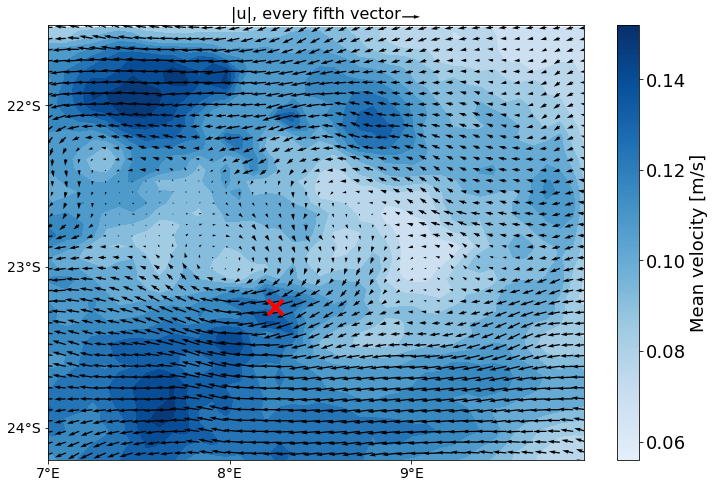

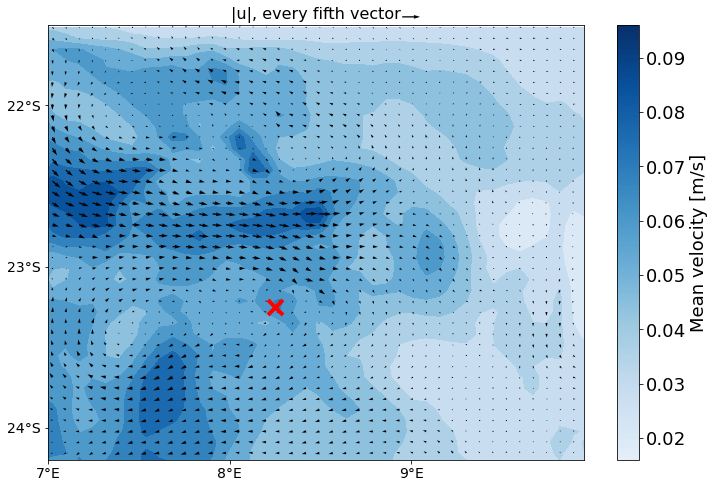

In [29]:
for i in [31,21]: #surface, 1000m openocean
    plt.figure(figsize=(12,8))
    cf=plt.contourf(plot.lon_rho,plot.lat_rho,plot.isel(s_rho=i).vel,cmap=new_cmap,levels=10)#,vmin=0,vmax=0.25)
    a=plt.quiver(plot.lon_rho,plot.lat_rho,plot.isel(s_rho=i).u,plot.isel(s_rho=i).v,scale=3)
    plt.quiverkey(a, 9, -21.45, 0.1, ' ', coordinates='data')
    cb = plt.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap),label='Mean velocity [m/s]')

    plt.xticks([7,8,9],['7°E','8°E','9°E'],fontsize=14, family='Arial')
    plt.yticks([-22,-23.,-24],['22°S','23°S','24°S'],fontsize=14, family='Arial')

    plt.xlim([7,9.95])
    plt.ylim([-24.2,-21.5])
    plt.plot(8.25, -23.25, 'rx',markersize=15,markeredgewidth=4,zorder=3)
    plt.title(f"|u|, every fifth vector", size=16)

In [22]:
vel_w_plot = vel_w.isel(eta_rho=128, xi_rho=slice(67,169,None),time=0)
vel_w_plot_mean = vel_w.isel(eta_rho=128, xi_rho=slice(67,169,None)).mean('time')
#.where(vel_w.depth < 2050,drop = True)

In [23]:
SIGMA=xr.open_dataset('../data/config/ROMS/sigma2depth_parent.nc')
ROMS_levels = SIGMA.hs.where(SIGMA.hs<7000)
ROMS_levels = ROMS_levels.isel(lat_rho=128).isel(lon_rho=slice(67,169,None))

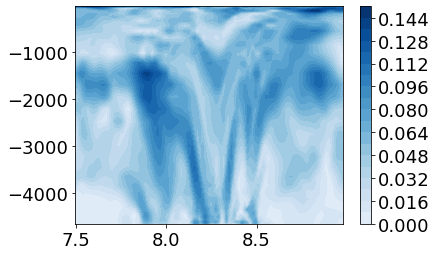

In [24]:
cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho,-ROMS_levels.isel(lon_rho=0),vel_w_plot.vel,levels=20,cmap=new_cmap)
cb = plt.colorbar()

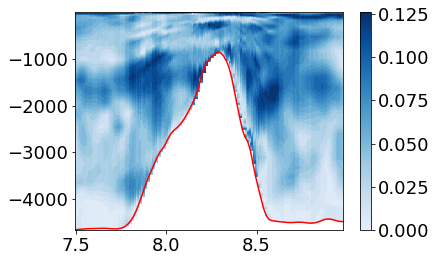

In [25]:
for i in [int(j) for j in np.linspace(0,len(ROMS_levels.lon_rho)-2,int(len(ROMS_levels.lon_rho-2)/2))]:
    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),vel_w_plot.vel.isel(xi_rho=slice(i,i+2)),levels=20,cmap=new_cmap)
for i in [int(j) for j in np.linspace(1,len(ROMS_levels.lon_rho)-3,int(len(ROMS_levels.lon_rho-2)/2)-1)]:
    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),vel_w_plot.vel.isel(xi_rho=slice(i,i+2)),levels=20,cmap=new_cmap)
plt.plot(ROMS_levels.isel(slev=0).lon_rho,-ROMS_levels.isel(slev=0),color='red')
cb = plt.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap))

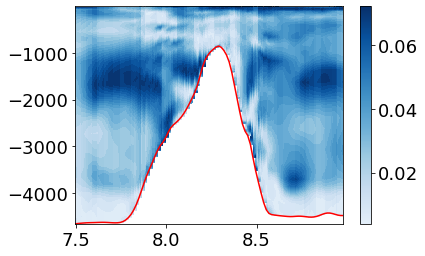

In [26]:
for i in [int(j) for j in np.linspace(0,len(ROMS_levels.lon_rho)-2,int(len(ROMS_levels.lon_rho-2)/2))]:
    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),vel_w_plot_mean.vel.isel(xi_rho=slice(i,i+2)),levels=20,cmap=new_cmap)
for i in [int(j) for j in np.linspace(1,len(ROMS_levels.lon_rho)-3,int(len(ROMS_levels.lon_rho-2)/2)-1)]:
    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),vel_w_plot_mean.vel.isel(xi_rho=slice(i,i+2)),levels=20,cmap=new_cmap)
plt.plot(ROMS_levels.isel(slev=0).lon_rho,-ROMS_levels.isel(slev=0),color='red')
cb = plt.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap))

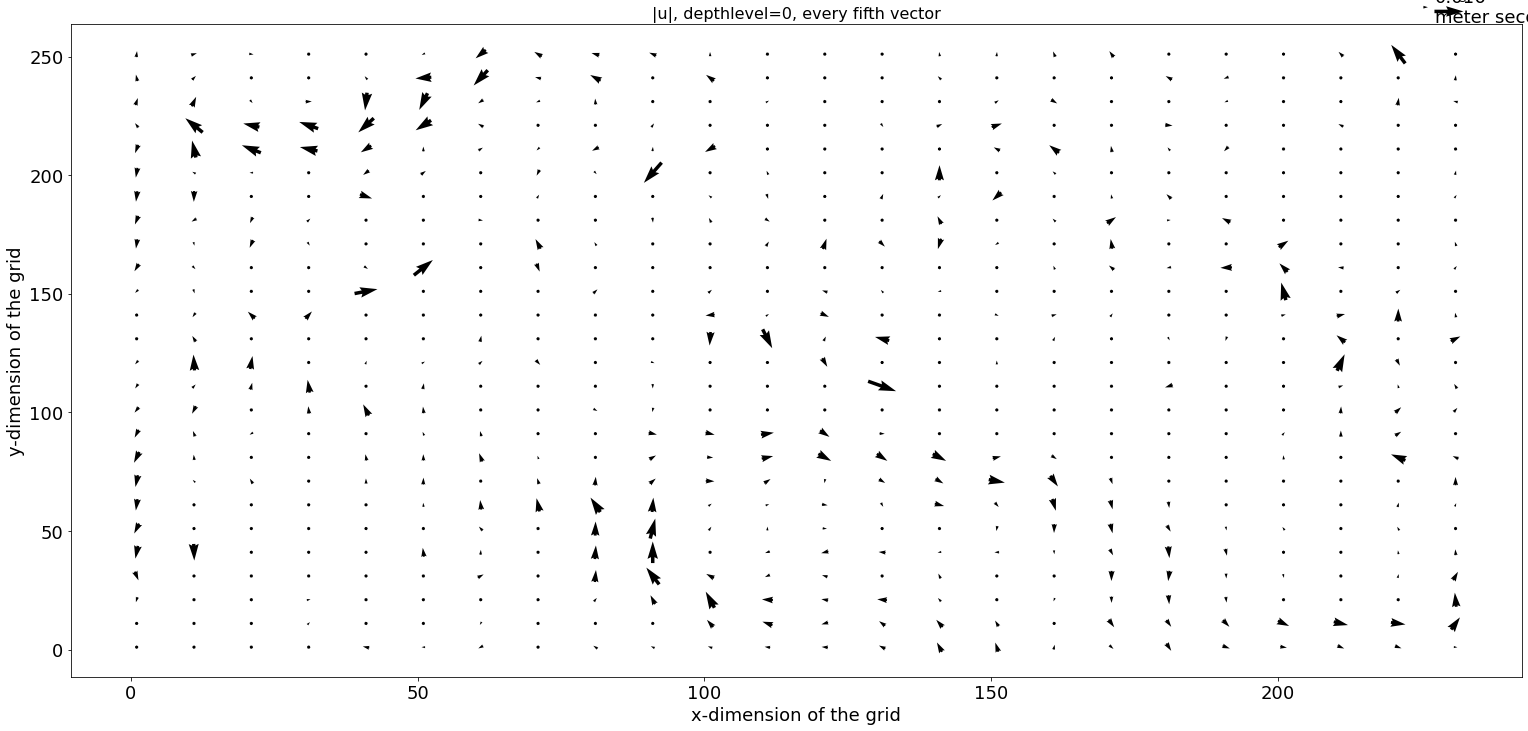

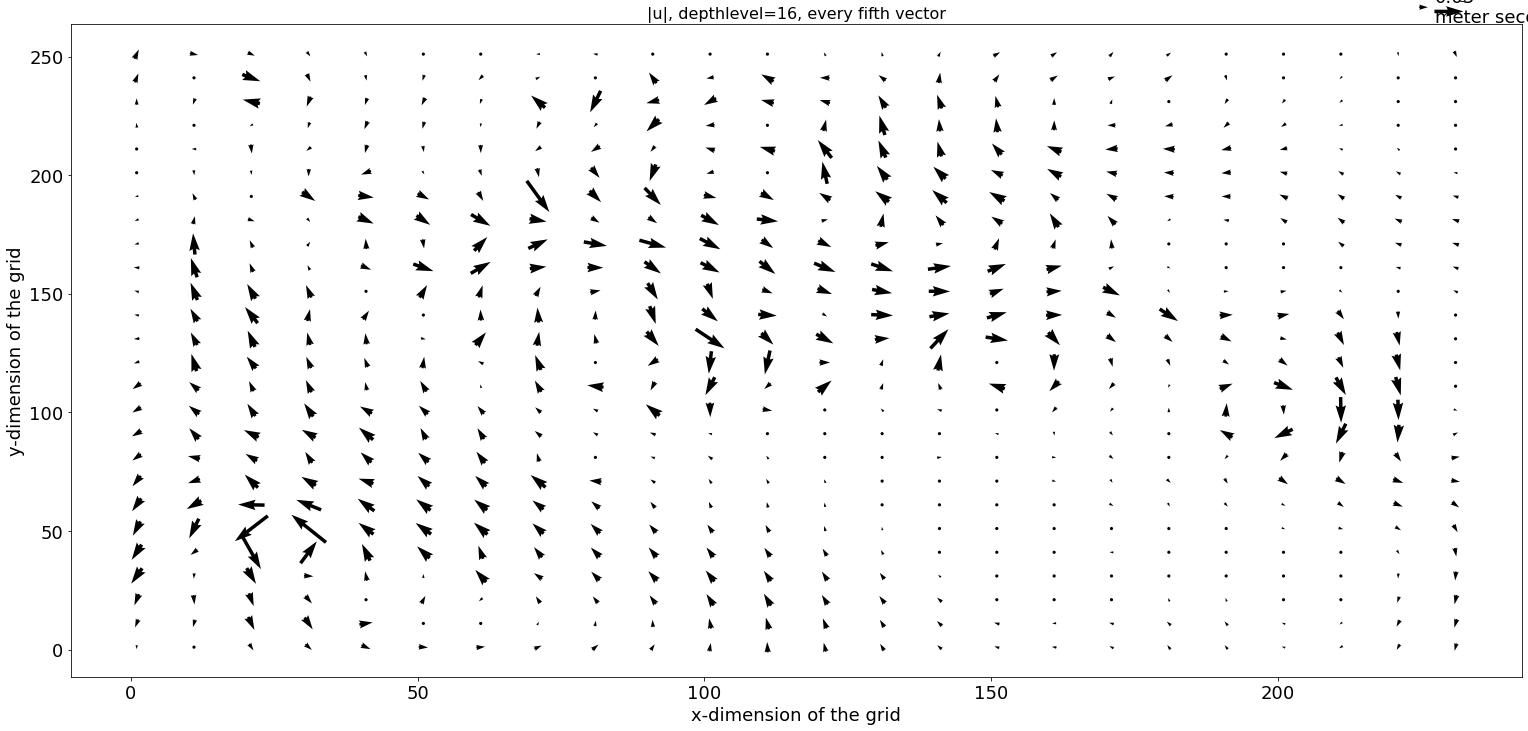

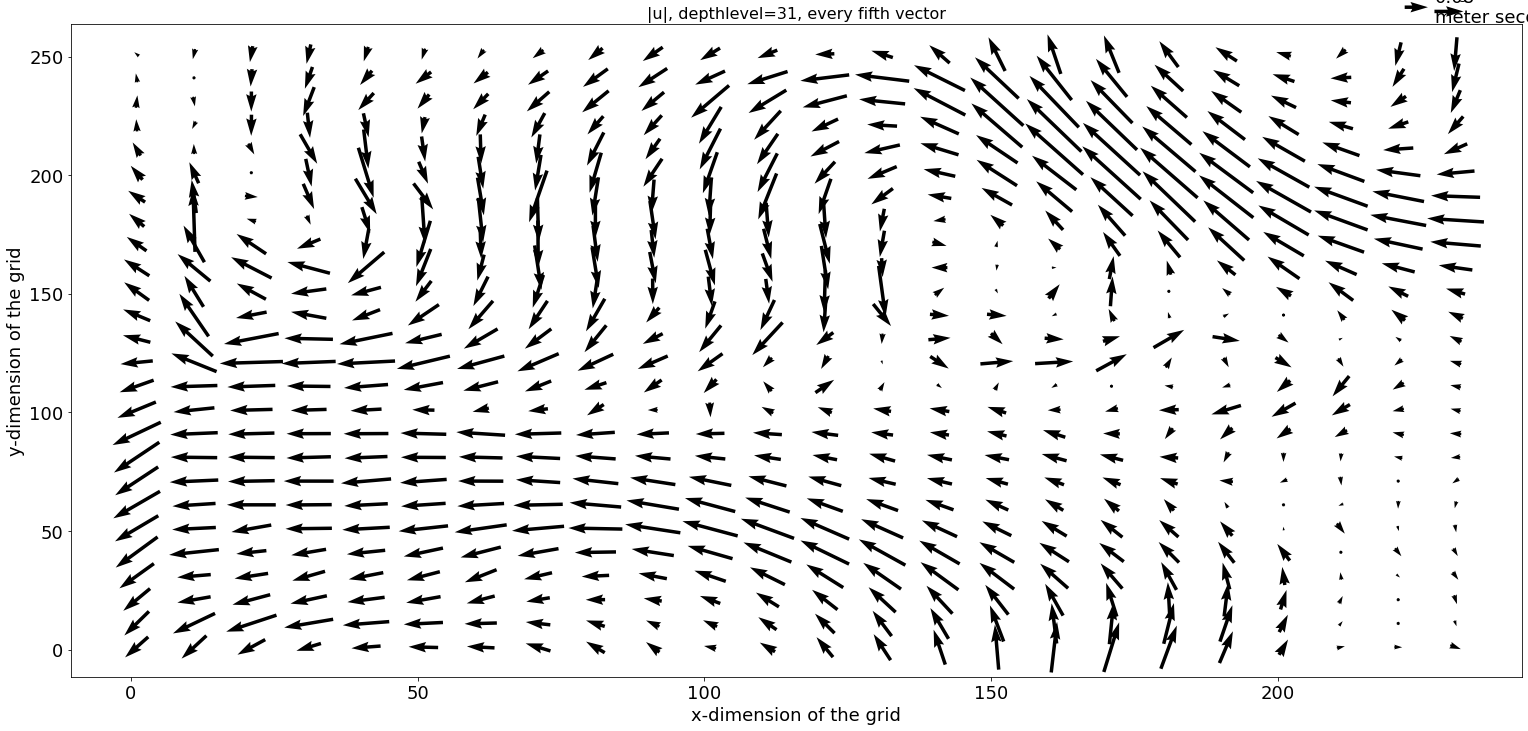

In [27]:
for i in [0,16,31]:
    fig, ax = plt.subplots(
        1, 1,
        sharex=True, sharey=True,
      #  subplot_kw={"projection": ccrs.PlateCarree()},
        figsize=(26, 12),
    )

    # vel["vel"].isel(depth=i).plot(
    #     ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    #     cmap=cmocean.cm.speed, cbar_kwargs={"label": "m/s"}
    # )
    # q = vel.isel(depth=i, x=slice(None, None, 5), y=slice(None, None, 5)).plot.quiver(
    #     ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", u="u", v="v", scale = 50, add_guide=True
    # )
    # ax.quiverkey(q, 1.03, 0.95, 1, r'$1 \frac{m}{s}$',
    #                    coordinates='axes')
    # ax.coastlines()
    # ax.set_extent([lon_left, lon_right, lat_bottom, lat_top], crs=ccrs.PlateCarree())
    # gl = ax.gridlines(draw_labels=["bottom", "left"], xlabel_style={"size": 14}, ylabel_style={"size": 14});
    # ax.add_feature(cartopy.feature.LAND, facecolor="lightgrey", zorder=1)
    
    #vel["vel"].isel(depth=i).where(mask==1).plot(
    #ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", levels=np.linspace(0, 1, 11),
    #cmap="Paired", cbar_kwargs={"label": "m/s"}, vmax=1
    #)
    #q2 = vel.where((vel["vel"] < 0.5) & (vel["vel"] > 0)).isel(depth=i, x=slice(None, None, 5), y=slice(None, None, 10)).plot.quiver(
    #    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", u="u", v="v", scale=4, color="black", add_guide=True
    #)
    #ax.quiverkey(q2, 0.9, 1.02, 0.1, r'$0.1 \frac{m}{s}$',
    #                   coordinates='axes')

    q = vel.where(vel["vel"] > 0).isel(s_rho=i, xi_rho=slice(None, None, 10), eta_rho=slice(None, None, 10), time=0).plot.quiver(
        ax=ax, x="xi_rho", y="eta_rho", u="u", v="v", scale=5, color="black", add_guide=True, zorder=1,
  #      transform=ccrs.PlateCarree()
    )
    ax.quiverkey(q, 0.95, 1.02, 0.1, r'$0.5 \frac{m}{s}$',
                       coordinates='axes')
    #ax.set_extent([lon_left, lon_right, lat_bottom, lat_top], crs=ccrs.PlateCarree())
 #   gl = ax.gridlines(draw_labels=["bottom", "left"], xlabel_style={"size": 14}, ylabel_style={"size": 14});

    ax.set_title(f"|u|, depthlevel={i}, every fifth vector".format(i=i), size=16);

    #plt.savefig(f"viking_2015-2019_{depth}m.png".format(depth=depth), dpi=300)

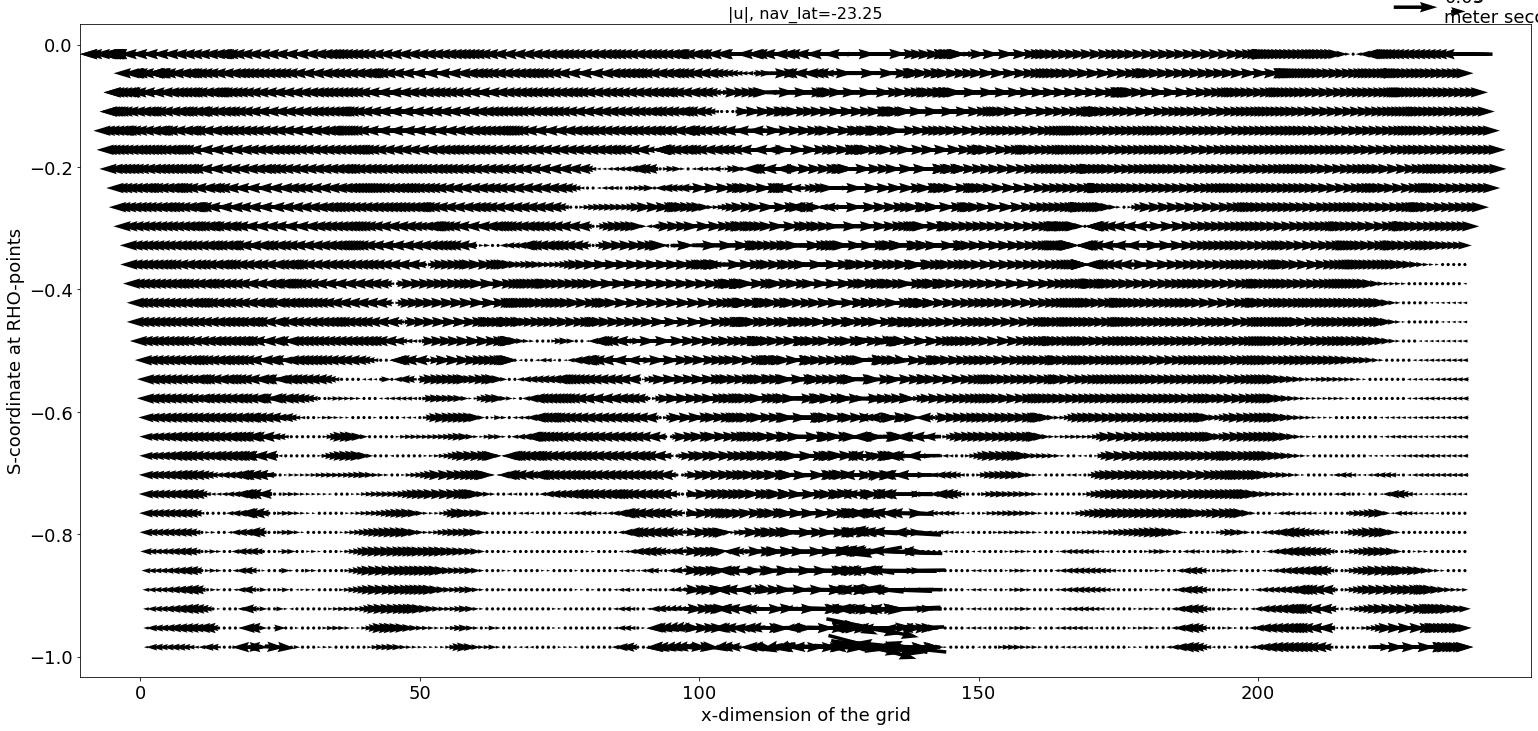

In [28]:
for i in [128]:
    fig, ax = plt.subplots(
        1, 1,
        sharex=True, sharey=True,
       # subplot_kw={"projection": ccrs.PlateCarree()},
        figsize=(26, 12),
    )    

    q = vel_w.where(vel_w["vel"] > 0).isel(eta_rho=i, xi_rho=slice(None, None, 1), s_rho=slice(None, None, 1), time=0).plot.quiver(
    ax=ax, x="xi_rho", y="s_rho", u="u", v="w", scale=1, color="black", add_guide=True, zorder=1
    )
    ax.quiverkey(q, 0.95, 1.02, 0.01, r'$0.01 \frac{m}{s}$',
                       coordinates='axes')
    
    ax.set_title(f"|u|, nav_lat=-23.25", size=16);
    #plt.gca().invert_yaxis()

    #plt.savefig(f"viking_2015-2019_{depth}m.png".format(depth=depth), dpi=300)

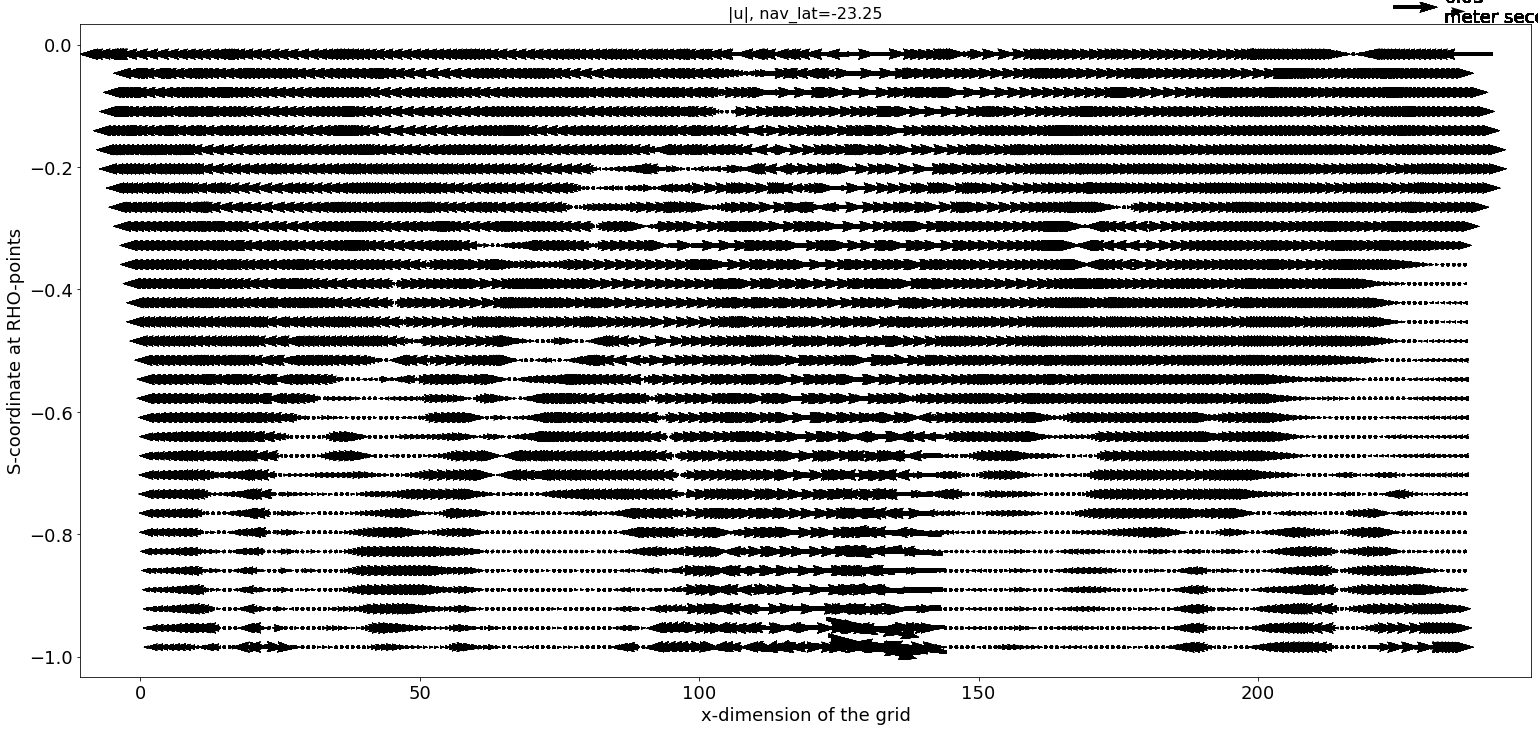

In [29]:
fig, ax = plt.subplots(
        1, 1,
        sharex=True, sharey=True,
       # subplot_kw={"projection": ccrs.PlateCarree()},
        figsize=(26, 12),
    )

#for i in [int(j) for j in np.linspace(0,len(ROMS_levels.lon_rho)-2,int(len(ROMS_levels.lon_rho-2)/2))]:
#    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),vel_w_plot_mean.vel.isel(xi_rho=slice(i,i+2)),levels=20)
#
#cb = plt.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap))
    
for k in [int(j) for j in np.linspace(0,len(ROMS_levels.lon_rho)-2,int(len(ROMS_levels.lon_rho-2)/2))]:
        q = vel_w.where(vel_w["vel"] > 0).isel(eta_rho=i, xi_rho=slice(None, None, 1), s_rho=slice(None, None, 1), time=0).plot.quiver(
        ax=ax, x="xi_rho", y="s_rho", u="u", v="w", scale=1, color="black", add_guide=True, zorder=1
    )
ax.quiverkey(q, 0.95, 1.02, 0.01, r'$0.01 \frac{m}{s}$',
                       coordinates='axes')
    #plt.plot(-ROMS_levels.isel(slev=0),color='red')
    
ax.set_title(f"|u|, nav_lat=-23.25", size=16);
    #plt.gca().invert_yaxis()

    #plt.savefig(f"viking_2015-2019_{depth}m.png".format(depth=depth), dpi=300)

In [33]:
vel_w_plot_mean.w.isel(xi_rho=slice(i,i+2))

<xarray.DataArray 'w' (s_rho: 32, xi_rho: 2)>
array([[ 2.68611984e-05,  2.60768211e-05],
       [ 2.32395178e-05,  2.79791529e-05],
       [ 1.79335166e-05,  2.44831554e-05],
       [ 1.17167647e-05,  2.12167051e-05],
       [ 6.71206408e-06,  1.08345639e-05],
       [-2.06354002e-06,  8.30161844e-06],
       [-7.13243980e-06,  5.37446431e-06],
       [-1.54812751e-05, -6.84127463e-06],
       [-2.52682730e-05, -1.89040748e-05],
       [-2.62223348e-05, -3.75984600e-05],
       [-3.62702558e-05, -4.78516558e-05],
       [-3.43626380e-05, -4.41120828e-05],
       [-3.91443682e-05, -4.39090472e-05],
       [-5.31141268e-05, -6.08193441e-05],
       [-7.34155110e-05, -8.48891286e-05],
       [-6.20553255e-05, -8.60385044e-05],
       [-4.41003504e-05, -5.75775048e-05],
       [-5.46870069e-05, -3.41420600e-05],
       [-2.68745334e-05, -5.72380623e-06],
       [ 5.23760855e-06,  1.48755053e-05],
       [ 1.21791027e-06,  2.01769080e-06],
       [-9.71242935e-06, -1.01212263e-05],
       [-1.85797717e-06,  7.87464217e-07],
       [-9.44457406e-06, -3.92200583e-08],
       [-1.46268785e-05, -9.90427816e-06],
       [-6.43465455e-06, -1.61144931e-06],
       [-1.51414370e-05, -2.44779494e-06],
       [-2.98430496e-05, -1.99178849e-05],
       [-1.02020485e-05, -1.35723203e-05],
       [ 3.50209734e-06, -2.08703727e-06],
       [-1.21847152e-05, -1.43376246e-05],
       [-6.66944970e-06, -1.12360003e-05]], dtype=float32)
Coordinates:
  * xi_rho   (xi_rho) float32 83.0 84.0
    eta_rho  float32 129.0
  * s_rho    (s_rho) float32 -0.9844 -0.9531 -0.9219 ... -0.04688 -0.01562
    lon_u    (xi_rho) float32 7.723 7.738
    lat_u    (xi_rho) float32 -23.24 -23.24
    lon_v    (xi_rho) float32 7.716 7.731
    lat_v    (xi_rho) float32 -23.24 -23.24
    lon_rho  (xi_rho) float32 7.716 7.731
    lat_rho  (xi_rho) float32 -23.24 -23.24

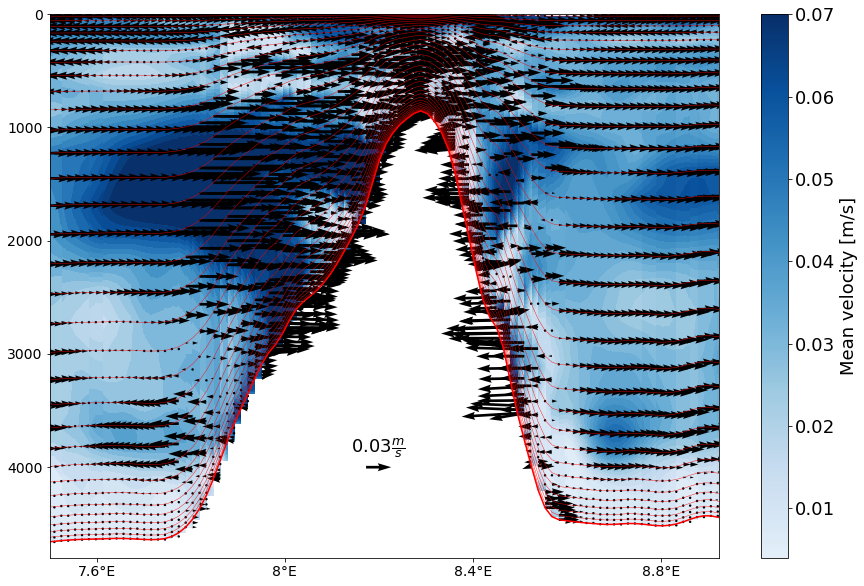

In [46]:
fig, ax = plt.subplots(
        1, 1,
        sharex=True, sharey=True,
        figsize=(15, 10),
)
    
for i in [int(j) for j in np.linspace(0,len(ROMS_levels.lon_rho)-2,int(len(ROMS_levels.lon_rho-2)/2))]:
    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),
                      vel_w_plot_mean.vel.isel(xi_rho=slice(i,i+2)),levels=20,cmap=new_cmap,vmax=0.07)
for i in [int(j) for j in np.linspace(1,len(ROMS_levels.lon_rho)-3,int(len(ROMS_levels.lon_rho-2)/2)-1)]:
    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),
                      vel_w_plot_mean.vel.isel(xi_rho=slice(i,i+2)),levels=20,cmap=new_cmap,vmax=0.07)
cb = plt.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap),label='Mean velocity [m/s]')

for i in [int(j) for j in np.linspace(0,len(ROMS_levels.slev)-1,len(ROMS_levels.slev))]:
    plt.plot(np.linspace(7.495,8.981,102),-(ROMS_levels.isel(slev=i)),color='red',linewidth='0.4')
plt.plot(ROMS_levels.isel(slev=0).lon_rho,-ROMS_levels.isel(slev=0),color='red')

for i in [int(j) for j in np.linspace(0,len(ROMS_levels.lon_rho)-2,int(len(ROMS_levels.lon_rho-2)/2))]:
    q= plt.quiver(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),
                  vel_w_plot_mean.isel(xi_rho=slice(i,i+2)).u,-vel_w_plot_mean.isel(xi_rho=slice(i,i+2)).w,
                 scale=0.8,width=0.004
                  #linewidths=0.1,
                 # headwidth=0.5,
                 # headlength= 3
                 )
    
    
plt.xticks([7.6,8,8.4,8.8],['7.6°E','8°E','8.4°E','8.8°E'],fontsize=14, family='Arial')
plt.yticks([-4000,-3000,-2000,-1000,0],[4000,3000,2000,1000,0],fontsize=14, family='Arial')

plt.xlim([7.5,8.925])
plt.ylim([-4800,0])
ax.quiverkey(q, 8.2, -4000, 0.03, r'$0.03 \frac{m}{s}$', coordinates='data');

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


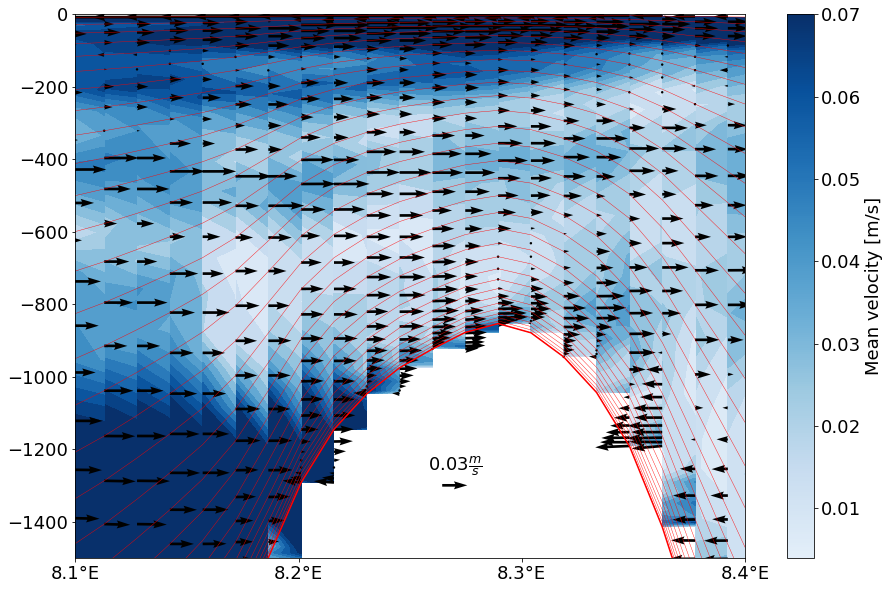

In [48]:
fig, ax = plt.subplots(
        1, 1,
        sharex=True, sharey=True,
        figsize=(15, 10),
)
    
for i in [int(j) for j in np.linspace(0,len(ROMS_levels.lon_rho)-2,int(len(ROMS_levels.lon_rho-2)/2))]:
    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),
                      vel_w_plot_mean.vel.isel(xi_rho=slice(i,i+2)),levels=20,cmap=new_cmap,vmax=0.07)
for i in [int(j) for j in np.linspace(1,len(ROMS_levels.lon_rho)-3,int(len(ROMS_levels.lon_rho-2)/2)-1)]:
    cf = plt.contourf(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),
                      vel_w_plot_mean.vel.isel(xi_rho=slice(i,i+2)),levels=20,cmap=new_cmap,vmax=0.07)
cb = plt.colorbar(ScalarMappable(norm=cf.norm, cmap=cf.cmap),label='Mean velocity [m/s]')

for i in [int(j) for j in np.linspace(0,len(ROMS_levels.slev)-1,len(ROMS_levels.slev))]:
    plt.plot(np.linspace(7.495,8.981,102),-(ROMS_levels.isel(slev=i)),color='red',linewidth='0.4')
plt.plot(ROMS_levels.isel(slev=0).lon_rho,-ROMS_levels.isel(slev=0),color='red')

for i in [int(j) for j in np.linspace(0,len(ROMS_levels.lon_rho)-2,int(len(ROMS_levels.lon_rho-2)/2))]:
    q= plt.quiver(ROMS_levels.isel(slev=0).lon_rho[i:i+2],-ROMS_levels.isel(lon_rho=i),
                  vel_w_plot_mean.isel(xi_rho=slice(i,i+2)).u,-vel_w_plot_mean.isel(xi_rho=slice(i,i+2)).w,
                 scale=0.8,width=0.004
                  #linewidths=0.1,
                 # headwidth=0.5,
                 # headlength= 3
                 )
    
    
plt.xlim([8.1,8.4])
plt.ylim([-1500,0])
plt.xticks([8.1,8.2,8.3,8.4],['8.1°E','8.2°E','8.3°E','8.4°E'],fontsize=18, family='Arial')
ax.quiverkey(q, 8.27, -1300, 0.03, r'$0.03 \frac{m}{s}$', coordinates='data');